In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_tsne = pd.read_parquet('data/results/df_tsne.parquet')
df_tsne.head()

,PC1,PC2,Label
0,-0.619348,-58.266243,Syn
1,-9.741438,-50.911644,Syn
2,16.100742,-0.544664,Syn
3,-9.215678,-67.778313,Syn
4,-20.283121,-51.996040,Syn


In [2]:
df_tsne_no_benign = pd.read_parquet('data/results/df_tsne_no_benign.parquet')
df_tsne_no_benign.head()

,PC1,PC2,Label
0,-0.619348,-58.266243,Syn
1,-9.741438,-50.911644,Syn
2,16.100742,-0.544664,Syn
3,-9.215678,-67.778313,Syn
4,-20.283121,-51.996040,Syn


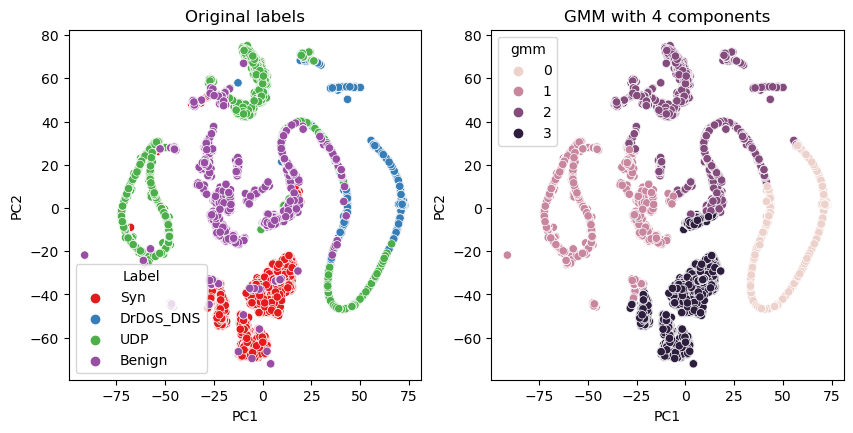

In [3]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=123)
gmm.fit(df_tsne[['PC1', 'PC2']])
df_tsne['gmm'] = gmm.predict(df_tsne[['PC1', 'PC2']])

# plot the results
fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=df_tsne, palette='Set1')
plt.title('Original labels')
plt.subplot(222)
sns.scatterplot(x='PC1', y='PC2', hue='gmm', data=df_tsne)
plt.title('GMM with {} components'.format(df_tsne['gmm'].nunique()))
plt.show()

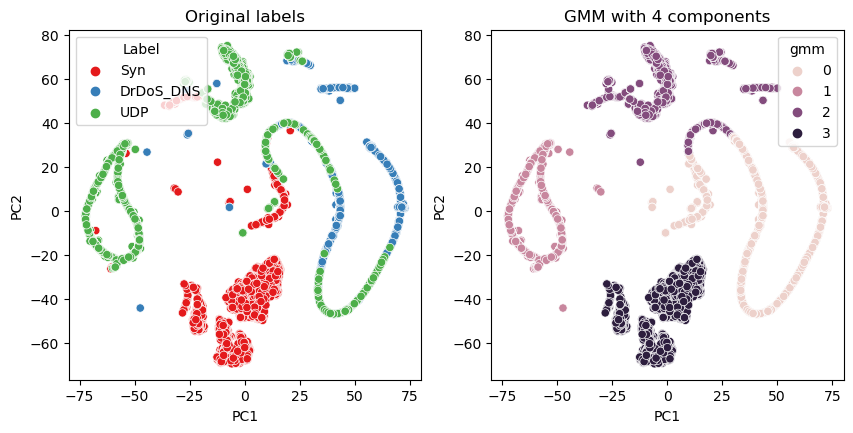

In [7]:
# apply the same GMM to the no-benign dataset
gmm_no_benign = GaussianMixture(n_components=4, covariance_type='full', random_state=123)
gmm_no_benign.fit(df_tsne_no_benign[['PC1', 'PC2']])
df_tsne_no_benign['gmm'] = gmm_no_benign.predict(df_tsne_no_benign[['PC1', 'PC2']])

# plot the results
fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=df_tsne_no_benign, palette='Set1')
plt.title('Original labels')
plt.subplot(222)
sns.scatterplot(x='PC1', y='PC2', hue='gmm', data=df_tsne_no_benign)
plt.title('GMM with {} components'.format(df_tsne_no_benign['gmm'].nunique()))
plt.show()

We can see that the GMM model is able to locate the different groups of data. The Syn group is well detected but the UDP and DrDoS_DNS are still difficult to determine.

In [5]:
# check for accuracy on the Syn prediction
accuracy_syn = df_tsne_no_benign[(df_tsne_no_benign['Label'] == 'Syn') & (df_tsne_no_benign['gmm'] == 3)].shape[0] / df_tsne_no_benign[df_tsne_no_benign['Label'] == 'Syn'].shape[0]
print('Accuracy on Syn: {:.2f}%'.format(accuracy_syn * 100))

Accuracy on Syn: 80.00%


The GMM Model is very good on clustering the Syn group but it is not able to separate the UDP and DrDoS_DNS groups.